# Question 1

Features: +, - on kidney disease test
Label: marker present (M)/ not present (not M)
$$P(+|M) = 0.95 $$
$$P(-|not M)=0.95$$
$$P(M)=0.01$$

## (a)

**Answer:** \ Given the conditional probabilities,
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$ 
and $$P[M]=0.01,\ P[not\ M]=1-0.01=0.99$$

We can compute:
$$P[+ \cap M]=0.95*0.01=0.0095,\ P[+ \cap not\ M]=(1-0.95)*0.99=0.0495$$
and
$$P[-\cap M]=(1-0.95)*0.01=0.0005,\ P[- \cap not\ M]=0.95*0.99=0.9405$$
Therefore, $$P(-|M) = \frac{P(- \cap M)}{P(M)}=0.0005/0.01=0.05$$  
 $$P(+|M) = \frac{P(+ \cap not\ M)}{P(not\ M)}=0.0495/0.99=0.0495$$

## (b)

**Answer:**  Given Baye's Theorem,
$$P(M|+) = \frac{P(+ | M)*P(M)}{P(+)}$$
Therefore, $$P(M|+)=\frac{0.95*0.01}{(0.0095+0.0495)}=0.1610$$
Based on the calculation, you do not have to be worried because the risk of having the marker is relatively low (0.1610) due to the marginalization.
The marginal probability of having the marker, which is low, accounts for the result the most.

## (c)

After P[M] becomes 0.1, $$P[not\ M]=1-0.1=0.9$$, and $$P[+ \cap M]=0.95*0.1=0.095,\ P[+ \cap not\ M]=(1-0.95)*0.9=0.045$$
Therefore, $$P(M|+)=\frac{0.95*0.1}{(0.095+0.045)}=0.6785$$

# Question 2

## (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
# Note: you can modify the template, define new attributes or functions as you want
class NaiveBayesClassifier():
    def __init__(self):
        # classes
        self.cls = []
        # statistics of features that belongs to different classes
        self.cls_stats = []
        # prior probablity, i.e. P(C)
        self.prior_prob = []
        
        self.trained = False
    
    @staticmethod
    def gaussian(X, mean, std):
        """
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability of each feature, shape (n_samples, n_features)
        """

        exponent = np.exp(-((X - mean) ** 2 / (2 * std ** 2)))
        prob_X = (1 / (np.sqrt(2 * np.pi) * std)) * exponent
        return prob_X
    
    @staticmethod
    def calculate_statistics(X):
        """
        Calculate the average and standard deviation of each feature based on the input data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
            
        Returns
        -------
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
        """
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return mean, std
    
    @staticmethod
    def calculate_prob(X, mean, std):
        """
        Calculate the prior probability that the input features belong to a specific class,
        i.e. P(X | C) = \prod_i P(X_i | C)
        which is defined by the statistics of features in that class.
        
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature in the speific class, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature in the specific class, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability that the features belong to a spcefic class, shape (n_samples,)
        """
        
        # Calculate the Gaussian probability for each feature
        probs = NaiveBayesClassifier.gaussian(X, mean, std)
        # Calculate the product of probabilities for all features (assume independence)
        prod_probs = np.prod(probs, axis=1)
        return prod_probs
    
    def fit(self, X, y):
        """
        Train the classifier by calculating the statistics of different features in each class
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        y: numpy.ndarray
            Labels (the actual classes), shape (n_samples)
        """
        
        ndata = y.shape[0] # the number of labels
        self.cls = np.unique(y) # eliminate the same classes output the actual number of labels
        for i in range(len(self.cls)):
            cls_filter = (y == self.cls[i])
            X_cls = X[cls_filter]
            mean, std = self.calculate_statistics(X_cls)
            self.prior_prob.append(cls_filter.sum() / ndata)
            self.cls_stats.append((mean, std))
        self.trained = True
            
    def predict(self, X):
        # Do the prediction by outputing the class that has highest probability
        assert self.trained, f"The classfier has not been trained. Call {self.__class__.__name__}.fit first"
        probs = []
        for i in range(len(self.cls)):
            mean, std = self.cls_stats[i]
            prob = self.calculate_prob(X, mean, std) * self.prior_prob[i]
            probs.append(prob)
        probs = np.array(probs).T  # Each row contains the probs for each class
        return self.cls[np.argmax(probs, axis=1)]

In [3]:
#Load the data
df = pd.read_csv("wines.csv")

X = df.drop(['Start assignment', 'ranking'], axis=1)
Y = df['ranking']
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol %             178 non-null    float64
 1   Malic Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alkalinity            178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Total phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid phenols  178 non-null    float64
 8   Proantho-cyanins      178 non-null    float64
 9   Color intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280 315             178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series n

C:\Users\ian32\AppData\Local\Temp\ipykernel_19528\4026856468.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=df["Alcohol %"], hist=True, kde=True, rug=False, ax=axs[1, 0])
C:\Users\ian32\AppData\Local\Temp\ipykernel_19528\4026856468.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=d

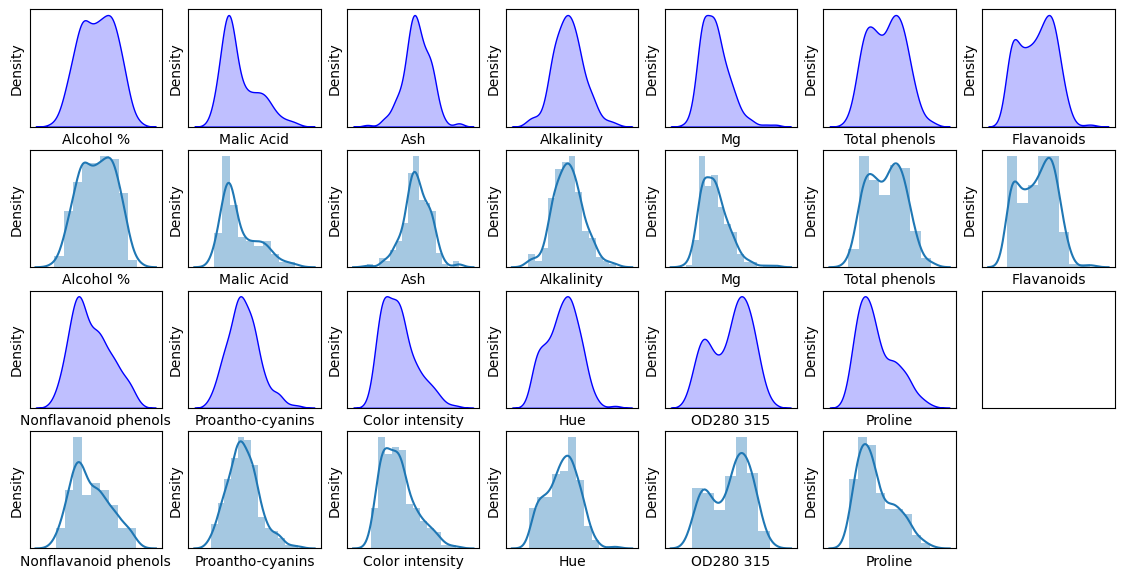

In [4]:
#Check the distribution of variables

fig, axs = plt.subplots(4, 7, figsize=(14, 7))
sns.kdeplot(df['Alcohol %'], fill=True, color="b", ax=axs[0, 0])
sns.distplot( a=df["Alcohol %"], hist=True, kde=True, rug=False, ax=axs[1, 0])

sns.kdeplot(df['Malic Acid'], fill=True, color="b", ax=axs[0, 1])
sns.distplot( a=df["Malic Acid"], hist=True, kde=True, rug=False, ax=axs[1, 1])

sns.kdeplot(df['Ash'], fill=True, color="b", ax=axs[0, 2])
sns.distplot( a=df["Ash"], hist=True, kde=True, rug=False, ax=axs[1, 2])

sns.kdeplot(df['Alkalinity'], fill=True, color="b", ax=axs[0, 3])
sns.distplot( a=df["Alkalinity"], hist=True, kde=True, rug=False, ax=axs[1, 3])

sns.kdeplot(df['Mg'], fill=True, color="b", ax=axs[0, 4])
sns.distplot( a=df["Mg"], hist=True, kde=True, rug=False, ax=axs[1, 4])

sns.kdeplot(df['Total phenols'], fill=True, color="b", ax=axs[0, 5])
sns.distplot( a=df["Total phenols"], hist=True, kde=True, rug=False, ax=axs[1, 5])

sns.kdeplot(df['Flavanoids'], fill=True, color="b", ax=axs[0, 6])
sns.distplot( a=df["Flavanoids"], hist=True, kde=True, rug=False, ax=axs[1, 6])

sns.kdeplot(df['Nonflavanoid phenols'], fill=True, color="b", ax=axs[2, 0])
sns.distplot( a=df["Nonflavanoid phenols"], hist=True, kde=True, rug=False, ax=axs[3, 0])

sns.kdeplot(df['Proantho-cyanins'], fill=True, color="b", ax=axs[2, 1])
sns.distplot( a=df["Proantho-cyanins"], hist=True, kde=True, rug=False, ax=axs[3, 1])

sns.kdeplot(df['Color intensity'], fill=True, color="b", ax=axs[2, 2])
sns.distplot( a=df["Color intensity"], hist=True, kde=True, rug=False, ax=axs[3, 2])

sns.kdeplot(df['Hue'], fill=True, color="b", ax=axs[2, 3])
sns.distplot( a=df["Hue"], hist=True, kde=True, rug=False, ax=axs[3, 3])

sns.kdeplot(df['OD280 315'], fill=True, color="b", ax=axs[2, 4])
sns.distplot( a=df["OD280 315"], hist=True, kde=True, rug=False, ax=axs[3, 4])

sns.kdeplot(df['Proline'], fill=True, color="b", ax=axs[2, 5])
sns.distplot( a=df["Proline"], hist=True, kde=True, rug=False, ax=axs[3, 5])

for i in range(4):
    for j in range(7):
        axs[i, j].xaxis.set_major_locator(plt.NullLocator())
        axs[i, j].yaxis.set_major_locator(plt.NullLocator())

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [5]:
subdf = df[df['ranking']==1]
mean_QA, std_QA = NaiveBayesClassifier.calculate_statistics(subdf['Alcohol %'])
prob_QA = NaiveBayesClassifier.gaussian(13.0, mean_QA, std_QA)
print(f"The probability of P(Alc=13% | cultivar 1) is {prob_QA}.")

The probability of P(Alc=13% | cultivar 1) is 0.23236757865410362.


#### Answer:
**(1)** First, extract the cultivar 1 data; then, compute the mean and standard deviation for the feature of the inquired wine attribute. Lastly, use the Gaussian pdf to get the probability of each sample for feature X, P(wine attribute x_i | cultivar 1).

Then, P(wine attribute X| cultivar 1) is the product of all P(wine attribute x_i | cultivar 1).
$$ P(wine\ attribute\ X |\ cultivar) = L(x_{i} | \theta = m_{x}, \sigma_{x}) = \prod_{\mu} \frac{1}{\sqrt{2\pi\sigma_{x}^2}} \exp\left(-\frac{(x_{i}^{\mu} - m_{x})^2}{2\sigma_{x}^2}\right) $$

**(2)** I chose Gaussian PDF because the feature x in the dataset is continuous data. The distribution of data for each feature shows that they are close to the Gaussian distribution (similar shape). Therefore, we can assume the data is a normal distribution.<br>

## (b)

Preprocess data:
+ Select relevant descriptors (columns other than "Start assignment" and "ranking"). Should get *178 datapoints and 13 features*.
+ Normalize the data with `StandardScaler` in sklearn.
+ The labels are in the "ranking" column.

*For debugging*: The accuracy could reach over 95\%.

In [6]:
from sklearn.model_selection import KFold

def calculate_accuracy(model, X, y):
    y_pred = model.predict(X)
    acc = np.sum(y_pred == y) / len(y)
    return acc

def KFoldNaiveBayes(k, X, y):
    """
    K-Fold Cross Validation for Naive Bayes Classifier
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    """
    kf =  KFold(n_splits=k, shuffle=True)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Define the model
        model = NaiveBayesClassifier()
        #Train the model
        model.fit(X_train,y_train)
        
        # Report prediction accuracy for this fold
        # use the calculate_accuracy() function
        train_acc = calculate_accuracy(model, X_train, y_train)
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy(model, X_test, y_test)
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print("Training accuracy:", np.mean(train_acc_all), "+/", np.std(train_acc_all), "-")
    print("Testing  accuracy:", np.mean(test_acc_all), "+/", np.std(test_acc_all), "-")

In [7]:
from sklearn.preprocessing import StandardScaler

X_features = df.drop(['Start assignment', 'ranking'], axis=1).values
y_label = df['ranking'].values

print(f"\nThe shape of X_features: {X_features.shape}")
print(f"\nThe shape of y_label: {y_label.shape}\n")

#Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_features)
# avg. and std. of scaled data
print("After scaling:")
print("Avg:", np.mean(X_norm, axis=0))
print("Std:", np.std(X_norm, axis=0))


The shape of X_features: (178, 13)

The shape of y_label: (178,)

After scaling:
Avg: [-3.05373704e-15 -6.98567296e-17 -8.23311456e-16 -7.98362624e-17
 -2.49488320e-17 -1.99590656e-17  5.98771968e-17  3.59263181e-16
 -5.33905005e-16  4.98976640e-17  1.99590656e-16  3.19345050e-16
 -1.19754394e-16]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
KFoldNaiveBayes(k=3, X=X_norm, y=y_label)

Train accuracy: 0.9915254237288136
Test accuracy: 0.95
Train accuracy: 0.9831932773109243
Test accuracy: 0.9661016949152542
Train accuracy: 0.9831932773109243
Test accuracy: 0.9830508474576272
Final results:
Training accuracy: 0.9859706594502208 +/ 0.0039278114892858 -
Testing  accuracy: 0.9663841807909604 +/ 0.013494430409600248 -


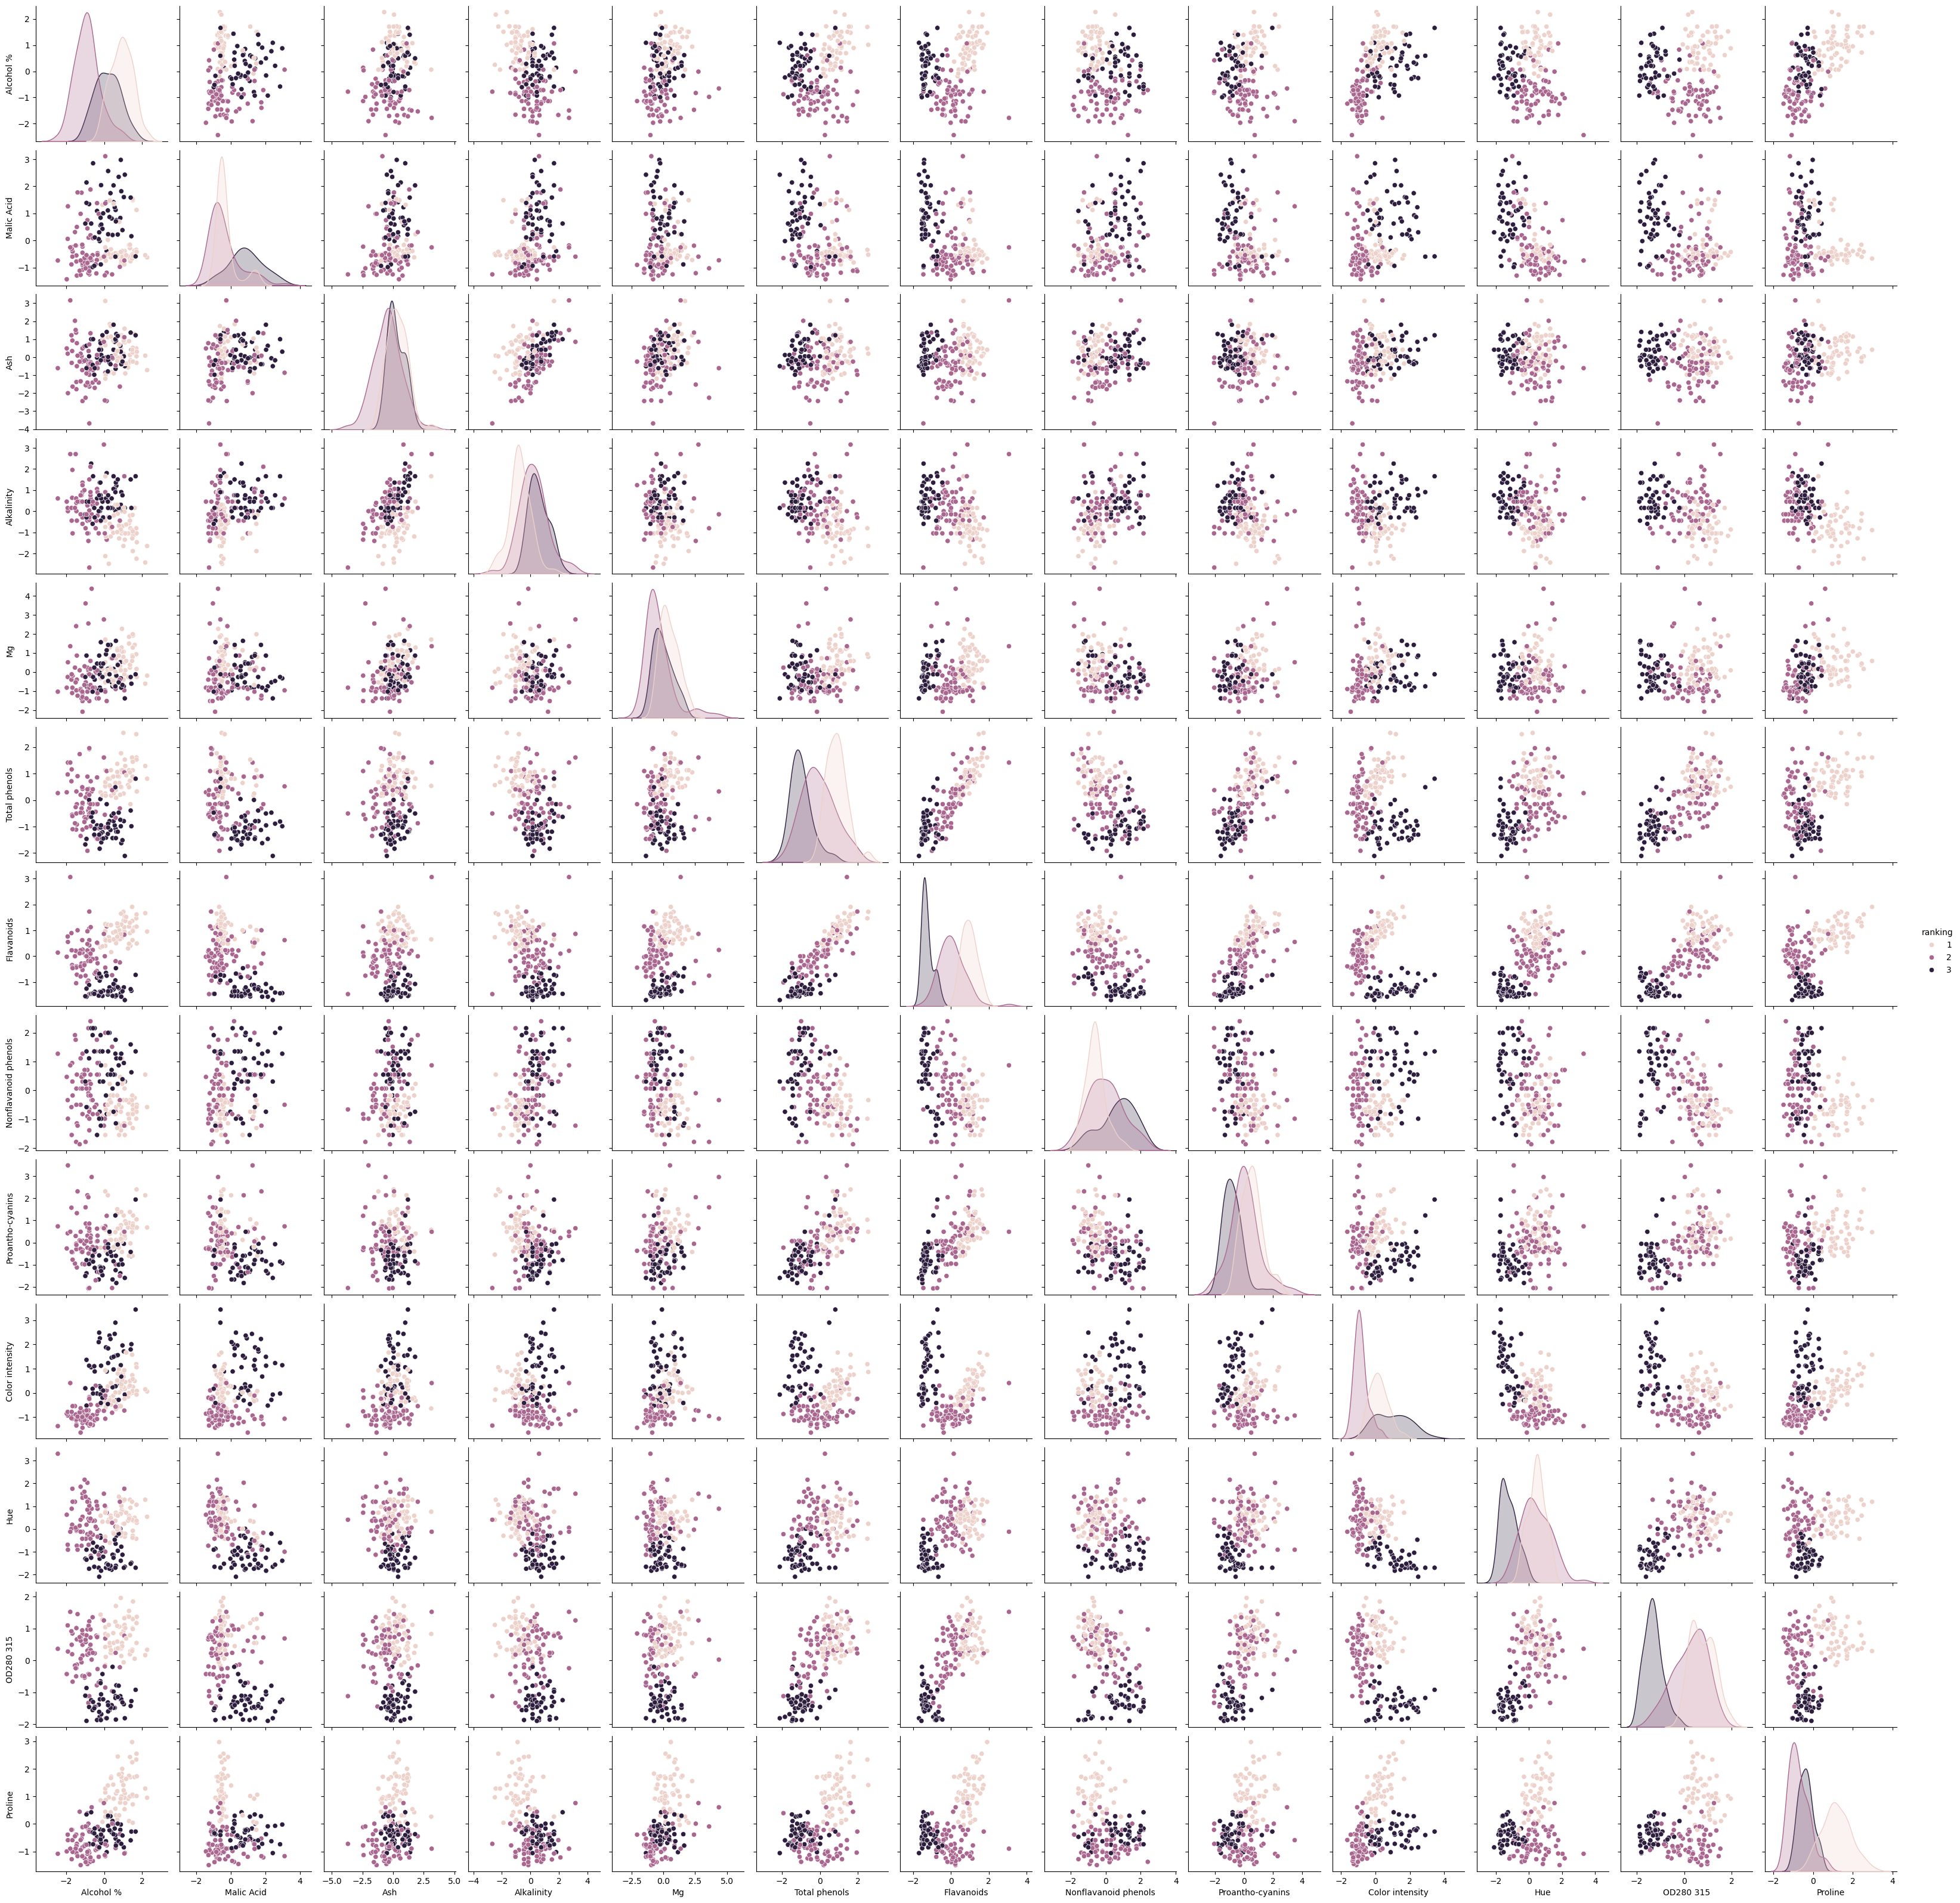

In [9]:
# Draw a pair plot
df_X_norm = pd.DataFrame(X_norm, columns=[
    'Alcohol %', 'Malic Acid', 'Ash', 'Alkalinity', 'Mg', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
      'Proantho-cyanins', 'Color intensity', 'Hue', 'OD280 315', 'Proline'])
new_df = pd.concat([df_X_norm,Y], axis=1)


sns.pairplot(data=new_df, hue='ranking')

Given the pair plot, discover that it is relatively helpful for classifing class 3 and non-class 3 by only using one features. Also, it is hard to seperate the data into 3 class only by any two features. This means we must consider using higher dimension (more features to classify) in a same time. 

# Question 3

## (a)

In [10]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [11]:
# Define your model here
# A neural net work without hidden layer and softmax activation function
class NN_onelayer(nn.Module): #inherent from nn.Module
    def __init__(self):
        super(NN_onelayer,self).__init__() #initialize and call the "_init_" from nn.Module
        # create a net with one hidden layer
        # input_dim 13, output_dim 1
        self.linear = nn.Linear(13, 3) # one linear regression layers
        self.activation = nn.Softmax(dim=1)
    
    def forward(self, X, activation=True):
        output = self.linear(X)
        if activation==True:
            output = self.activation(output)
        return output

In [12]:
# Convert ndarray into torch tensor
X_torch = torch.tensor(X_norm, dtype=torch.float32)
y_torch = torch.tensor(y_label - 1)

# Initialize the model
NNmodel = NN_onelayer()

# Send the data into the model without backpropagation
with torch.no_grad():
    # Print the outcome of linear regression (activation = False)
    logit = NNmodel(X_torch, activation=False)
    print(f"Output without softmax activation function:\n", pd.DataFrame(logit))

    # Print the outcome of layer (activation = True)
    probabilities = NNmodel(X_torch, activation = True)
    print(f"Output with softmax activation function:\n", pd.DataFrame(probabilities))

Output without softmax activation function:
             0         1         2
0    0.212584 -0.365737 -0.091972
1    0.151665 -0.087324  0.114250
2   -0.759523 -0.741654  0.719980
3   -0.834827 -0.181785  0.685356
4   -0.804304 -0.063562  0.754795
..        ...       ...       ...
173  0.475914  0.473465 -0.833435
174  0.419945  0.455151 -1.509446
175  0.374649  1.046752 -1.425254
176 -0.200984  1.168678 -0.585127
177  0.196895  0.278727 -0.204983

[178 rows x 3 columns]
Output with softmax activation function:
             0         1         2
0    0.435106  0.244025  0.320869
1    0.363544  0.286263  0.350193
2    0.156036  0.158849  0.685116
3    0.133432  0.256374  0.610194
4    0.127356  0.267127  0.605517
..        ...       ...       ...
173  0.441005  0.439926  0.119069
174  0.458491  0.474920  0.066590
175  0.320136  0.626940  0.052923
176  0.178093  0.700620  0.121287
177  0.363064  0.394024  0.242912

[178 rows x 3 columns]


**Answer:** Even though we can get the results of classification by the maximum values of linear regression outputs, softmax changes these values into probabilities. Changing into probabilities makes it interpretable for scientists and convenient for further calculations.

## (b)

*For debugging*: The accuracy could reach over 95\% if the hyperparamters are tuned properly.

In [13]:
def train_and_val(model, X_train, y_train, epochs, draw_curve=True):
    """
    Further split the data into acutal train and validation subsets.
    """
    # Define your loss function, optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
    X_train_in, X_val, y_train_in, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    val_losses = []
    lowest_val_loss = np.inf
    
    weights = {}
    for i in range(epochs):
        # Compute the loss and do back-propagation
        y_train_pred = model(X_train_in)
        loss = loss_func(y_train_pred, y_train_in)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()  # Put the model in evaluation mode
        
        # Compute validation loss and keep track of the lowest val loss
        with torch.no_grad():
            val_loss = loss_func(model(X_val),y_val)
        
        if val_loss < lowest_val_loss:
            lowest_val_loss = val_loss
            weights = model.state_dict() 
        val_losses.append(val_loss)
        
    # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs = np.argmin(val_losses)
    print("Number of epochs with lowest validation:", final_epochs)
    print(f"Validation loss: {np.min(val_losses)}")
    # Recover the model weights
    model.load_state_dict(weights)

    if draw_curve:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), constrained_layout=True)
        ax.plot(np.arange(epochs), val_losses, label='Validation loss')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
    
    return model, np.min(val_losses)


def calculate_accuracy_nn(model, X, y):
    with torch.no_grad():
        y_pred = torch.argmax(model(X), axis=1)
        acc = torch.sum(y_pred == y) / len(y)
    return acc.detach().numpy()


def KFoldNN(k, X, y, epochs=500):
    """
    K-Fold Validation for Neural Network
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    epochs: int
        Number of epochs during training
    """
    # K-Fold
    kf = KFold(n_splits=k, shuffle=True)
    train_acc_all = []
    test_acc_all = []
    valid_losses = []
    for train_index, test_index in kf.split(X):
        X_train, X_test =  X[train_index], X[test_index]
        y_train, y_test =  y[train_index], y[test_index]
        
        # further do a train/valid split on X_train
        model, valid_loss = train_and_val(NN_onelayer(), X_train , y_train, epochs, draw_curve=True)

        # Record the validation loss for each fold
        valid_losses.append(np.min(valid_loss))
        
        # Report prediction accuracy for this fold
        # use calculate_accuracy_nn() function
        train_acc = calculate_accuracy_nn(model, X_train, y_train)
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy_nn(model, X_test, y_test)
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print("Training accuracy:", np.mean(train_acc_all), "+/", np.std(train_acc_all), "-")
    print("Testing  accuracy:", np.mean(test_acc_all), "+/", np.std(test_acc_all), "-")
    print("The minimum validation loss among 3 folds:", np.mean(valid_losses), "+", np.std(valid_losses), "-")

Number of epochs with lowest validation: 499
Validation loss: 0.5913400053977966
Train accuracy: 0.9915254
Test accuracy: 0.98333335
Number of epochs with lowest validation: 499
Validation loss: 0.5602496862411499
Train accuracy: 1.0
Test accuracy: 0.9661017
Number of epochs with lowest validation: 499
Validation loss: 0.6787340641021729
Train accuracy: 0.9747899
Test accuracy: 0.9322034
Final results:
Training accuracy: 0.98877174 +/ 0.010474539 -
Testing  accuracy: 0.9605462 +/ 0.021240147 -
The minimum validation loss among 3 folds: 0.6101079 + 0.0501585 -


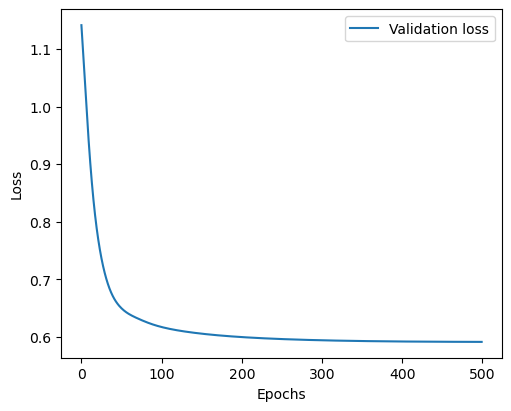

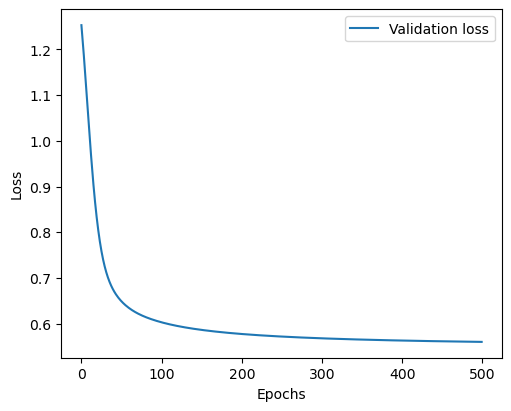

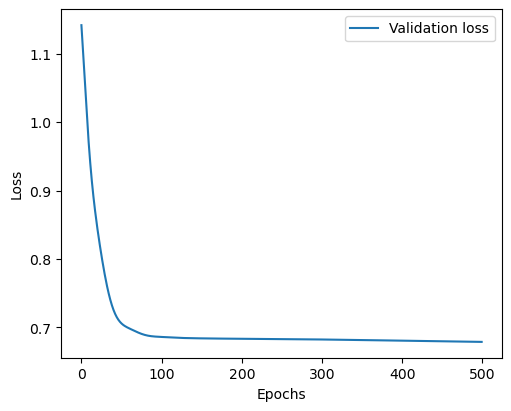

In [14]:
# Utilize the Neural Network model to make the prediction
KFoldNN(k=3, X=X_torch, y=y_torch, epochs=500)

Number of epochs with lowest validation: 427
Validation loss: 0.6204487681388855
Train accuracy: 0.9830508
Test accuracy: 1.0
Number of epochs with lowest validation: 549
Validation loss: 0.6098163723945618
Train accuracy: 0.99159664
Test accuracy: 1.0
Number of epochs with lowest validation: 549
Validation loss: 0.6156352162361145
Train accuracy: 0.9831933
Test accuracy: 0.9661017
Final results:
Training accuracy: 0.98594695 +/ 0.0039953827 -
Testing  accuracy: 0.98870057 +/ 0.01597981 -
The minimum validation loss among 3 folds: 0.6153001 + 0.00434712 -


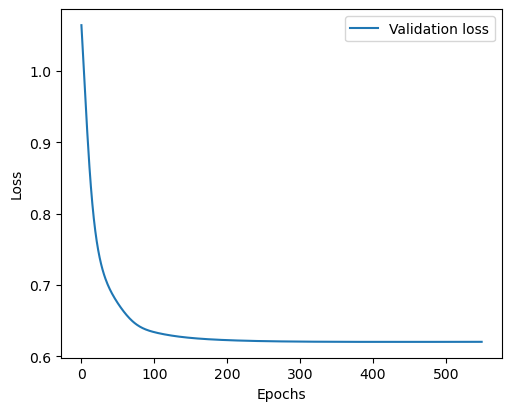

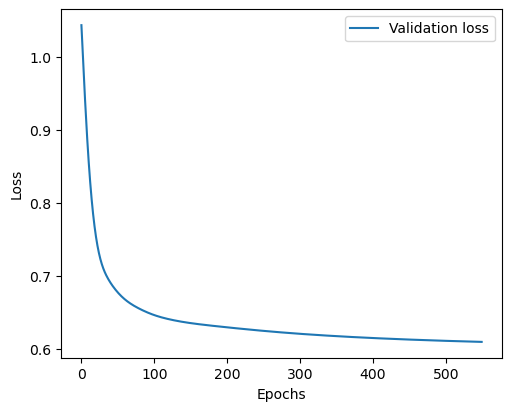

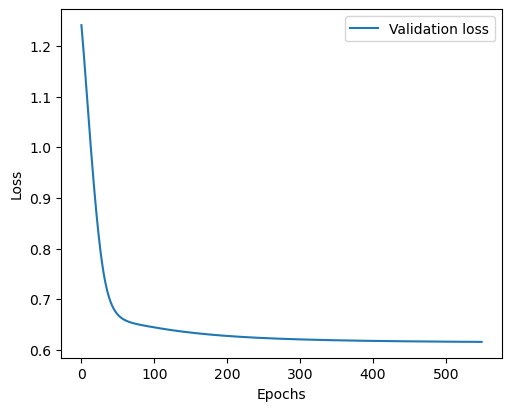

In [15]:
# Input the different hyperparameter (epochs) into the model
KFoldNN(k=3, X=X_torch, y=y_torch, epochs=550)

Number of epochs with lowest validation: 599
Validation loss: 0.5967243313789368
Train accuracy: 0.9915254
Test accuracy: 0.98333335
Number of epochs with lowest validation: 599
Validation loss: 0.5713724493980408
Train accuracy: 1.0
Test accuracy: 0.9661017
Number of epochs with lowest validation: 599
Validation loss: 0.5537191033363342
Train accuracy: 1.0
Test accuracy: 0.9661017
Final results:
Training accuracy: 0.99717516 +/ 0.003994959 -
Testing  accuracy: 0.97184557 +/ 0.008123075 -
The minimum validation loss among 3 folds: 0.5739386 + 0.017650332 -


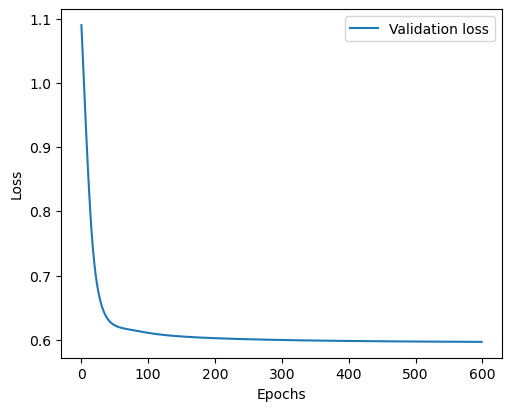

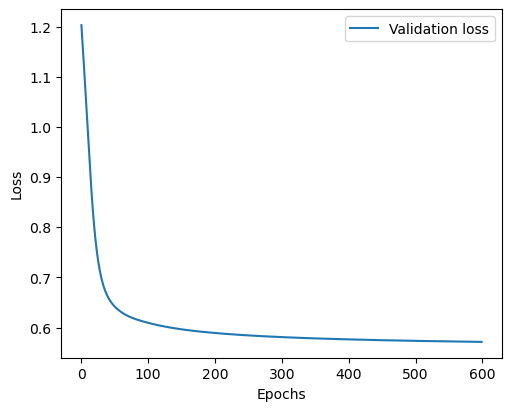

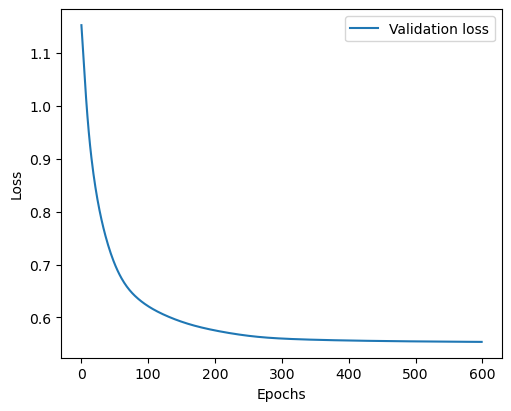

In [16]:
# Input the different hyperparameter (epochs) into the model
KFoldNN(k=3, X=X_torch, y=y_torch, epochs=600)

Number of epochs with lowest validation: 449
Validation loss: 0.58366459608078
Train accuracy: 0.9915254
Test accuracy: 0.98333335
Number of epochs with lowest validation: 449
Validation loss: 0.571050226688385
Train accuracy: 1.0
Test accuracy: 0.91525424
Number of epochs with lowest validation: 449
Validation loss: 0.5659694075584412
Train accuracy: 1.0
Test accuracy: 0.9830508
Final results:
Training accuracy: 0.99717516 +/ 0.003994959 -
Testing  accuracy: 0.9605462 +/ 0.032026418 -
The minimum validation loss among 3 folds: 0.57356143 + 0.0074390615 -


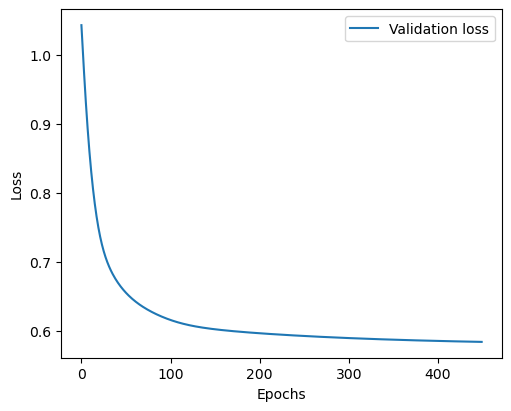

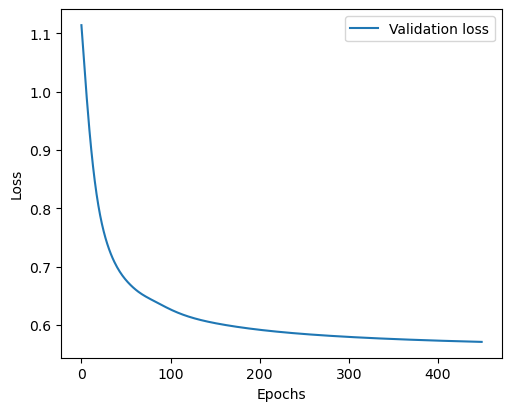

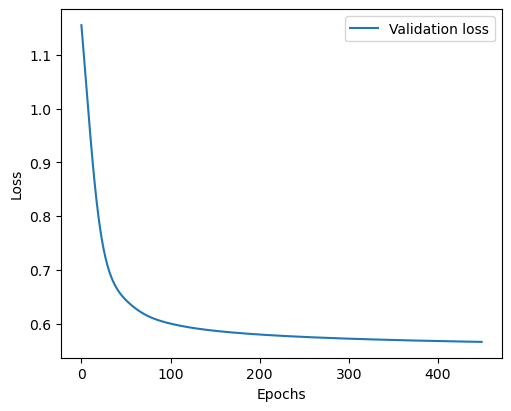

In [17]:
# Input the different hyperparameter (epochs) into the model
KFoldNN(k=3, X=X_torch, y=y_torch, epochs=450)

**Answer:** the comparison of performance between the solution Q2 and Q3: (mean / standard deviation)<br>

+ Q2 (using the final results):<br>
    Training accuracy: 0.9859706594502208 / 0.0039278114892858 <br>
    Testing  accuracy: 0.9663841807909604 / 0.013494430409600248 <br>

+ Q3 (using the best final results among models with different epochs-epochs=550):<br>
    Training accuracy: 0.98594695 / 0.0039953827 <br>
    Testing  accuracy: 0.98870057 / 0.01597981 <br>

**Analysis:**
Both of their results are great, though the model in Q3 is slightly better. However, the training outcome varies at different times of executing the codes. The model in Q2 achieved better accuracy a few times. Therefore, I think they are equally good at classifying this dataset.